# EDA

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
noaa_data = pd.read_csv('data/noaa_data_clean.csv', index_col= False)

In [33]:
noaa_data.columns

Index(['statecode', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi',
       'zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'state', 'month', 'year'],
      dtype='object')

In [34]:
noaa_data.describe()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax,month,year
count,4536.000000,4536.0,4536.00000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,...,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,3.666667,0.0,195756.50000,1.439632,53.873501,-0.221673,-0.125291,-0.135783,-0.148254,89.820547,...,-0.195877,-0.262463,-0.461329,-0.659808,-0.858717,-1.654921,40.379012,67.360075,6.500000,1957.500000
std,1.247357,0.0,3637.59477,1.470650,16.276709,4.486487,4.570421,4.124317,4.481877,406.575777,...,4.558701,5.231460,6.860275,8.165679,9.285466,12.790137,15.277770,17.447121,3.452433,36.375931
min,2.000000,0.0,189501.00000,-9.990000,-99.900000,-99.990000,-99.990000,-99.990000,-99.990000,-9999.000000,...,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.900000,-99.900000,1.000000,1895.000000
25%,2.000000,0.0,192606.75000,0.507500,43.500000,-2.000000,-2.120000,-1.370000,-1.910000,0.000000,...,-0.670000,-0.700000,-0.690000,-0.720000,-0.700000,-0.740000,31.500000,55.200000,3.750000,1926.000000
50%,4.000000,0.0,195756.50000,1.110000,53.500000,-0.300000,-0.385000,-0.210000,-0.130000,12.000000,...,-0.005000,0.005000,-0.010000,0.000000,0.000000,-0.020000,40.400000,67.300000,6.500000,1957.500000
75%,5.000000,0.0,198906.25000,1.940000,66.500000,1.760000,2.082500,1.090000,1.800000,126.000000,...,0.690000,0.660000,0.680000,0.690000,0.690000,0.640000,51.800000,81.300000,9.250000,1989.000000
max,5.000000,0.0,202012.00000,12.500000,84.100000,8.300000,8.300000,9.600000,8.300000,788.000000,...,3.090000,3.090000,3.070000,3.090000,3.090000,3.090000,68.800000,99.300000,12.000000,2020.000000


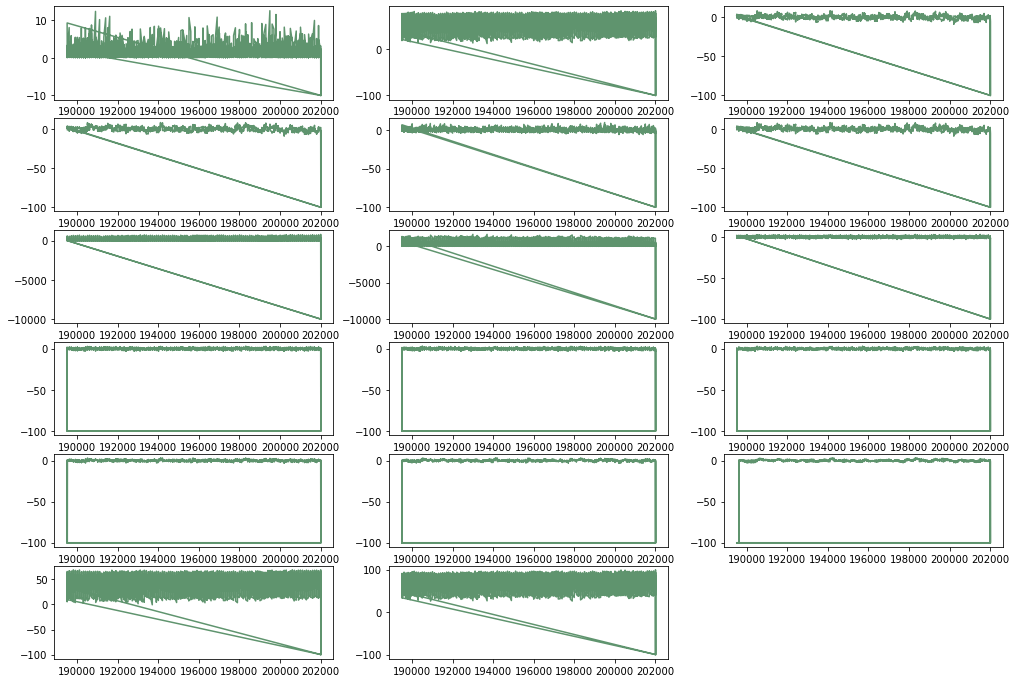

In [38]:
climate_cols = ['pcp', 'tavg', 'pdsi', 'phdi','zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
               'sp12', 'sp24', 'tmin', 'tmax']

plt.figure(figsize=(17,12))
for i in range(len(climate_cols)):
    plt.subplot(6,3,i+1)
    plt.plot(noaa_data['yearmonth'], noaa_data[climate_cols[i]], color = '#5f946e')

## Jesse ---------------------------------------------------------

put all of your code between here and the next person's name only

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only